In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/CODSOFT/DS/advertising.csv")

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Summary Statistics
summary = df.describe()
print(summary)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


### EDA

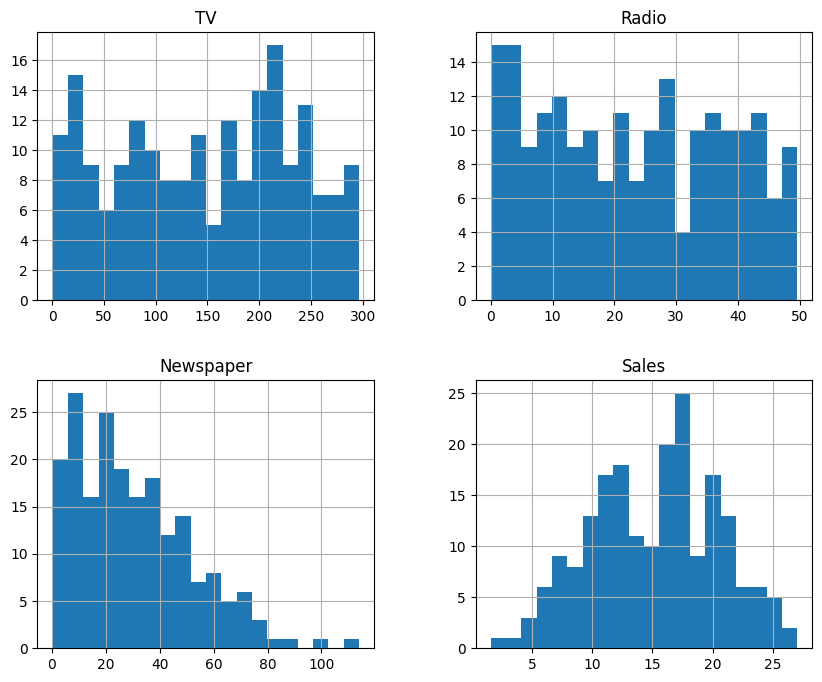

In [ ]:
# Histograms for each feature
df.hist(bins=20, figsize=(10, 8))
plt.show()

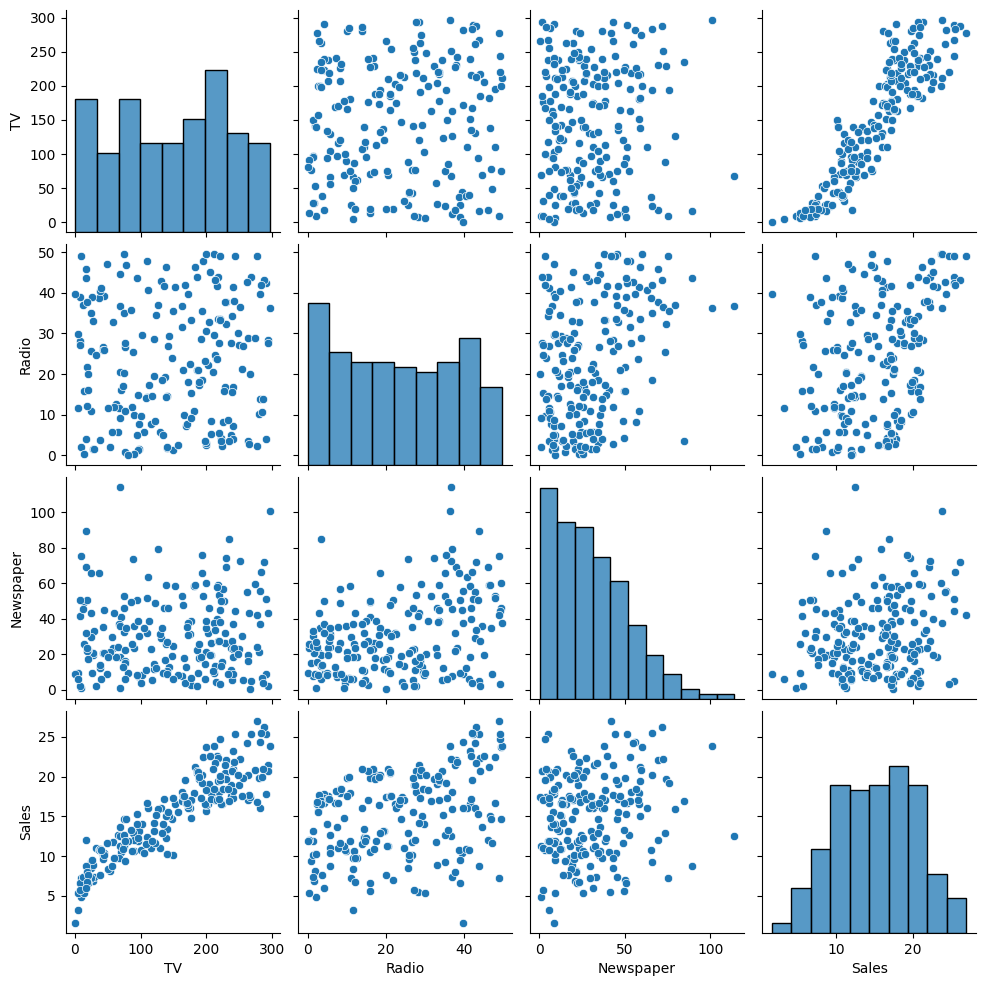

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

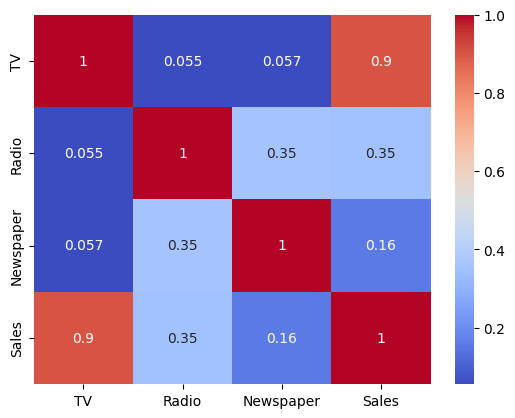

In [ ]:
# Correlation Matrix as a heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Univariate Analysis

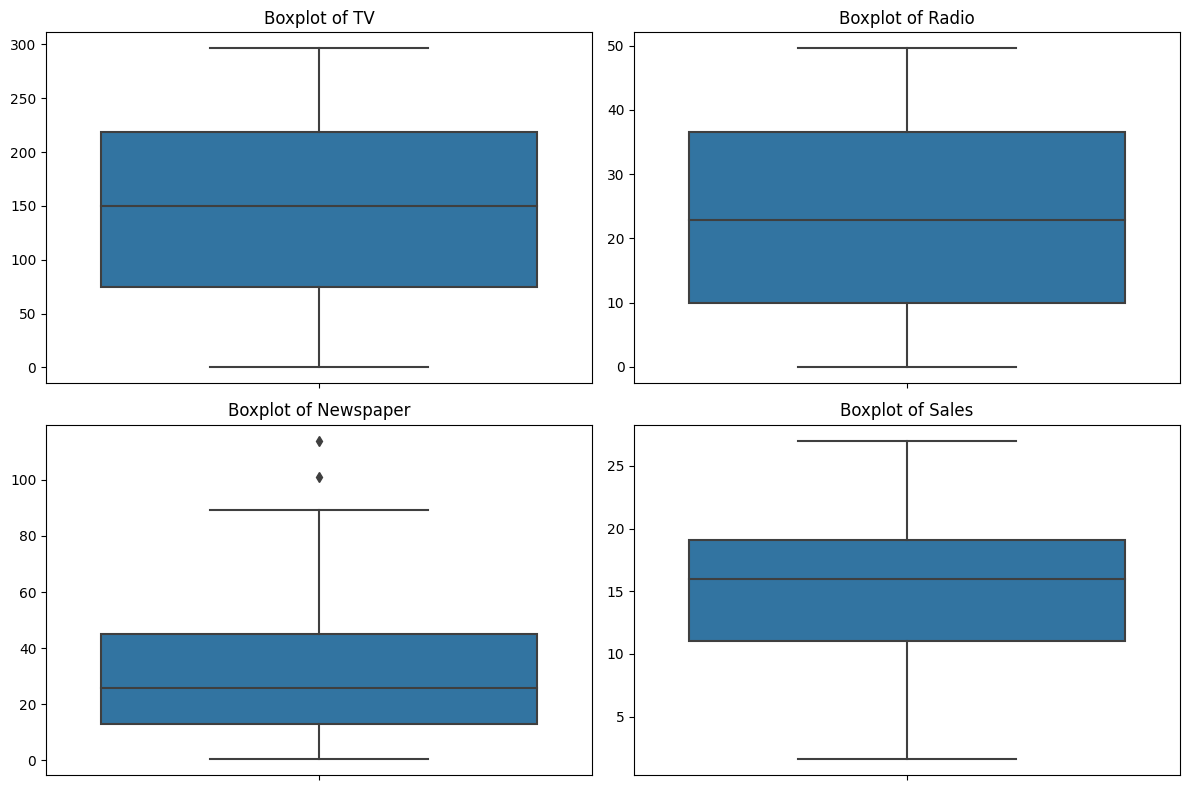

In [ ]:
# Creating box plots for each feature to identify outliers and quartiles
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

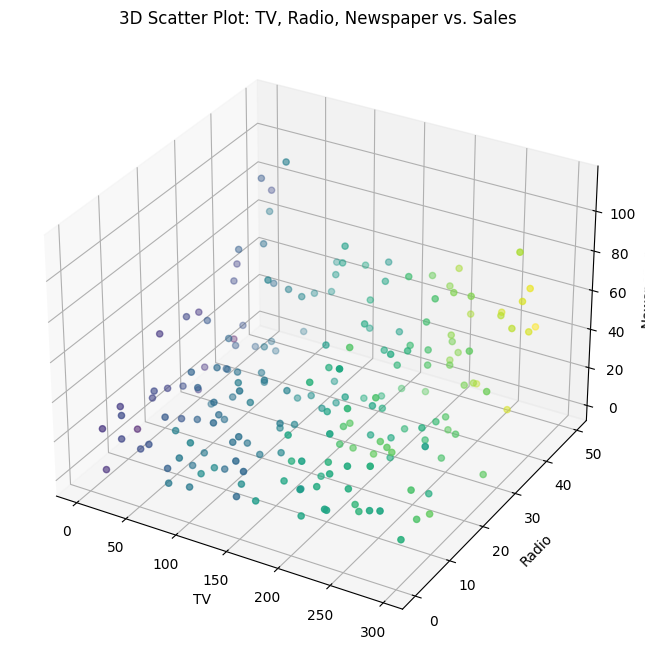

In [ ]:
# Create a 3D scatter plot to visualize the impact of TV, Radio, and Newspaper on Sales
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['TV'], df['Radio'], df['Newspaper'], c=df['Sales'], cmap='viridis')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
ax.set_title('3D Scatter Plot: TV, Radio, Newspaper vs. Sales')

plt.show()

Outlier Detection

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for each data point
z_scores = zscore(df)

# Define a threshold for considering data points as outliers
threshold = 3

# Find data points with z-scores above the threshold
outliers = (z_scores > threshold).any(axis=1)

# Display the outliers
outliers_data = df[outliers]
print(outliers_data)

        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Features (advertising mediums)
X = df[['TV', 'Radio', 'Newspaper']]
# Target variable (Sales)
y = df['Sales']

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.9077569102710896


In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const        4.714126
TV           0.054509
Radio        0.100945
Newspaper    0.004337
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           8.51e-78
Time:                        07:13:20   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7141      0.352     13.407      0.0

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-30-f6bd2f4e3b5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


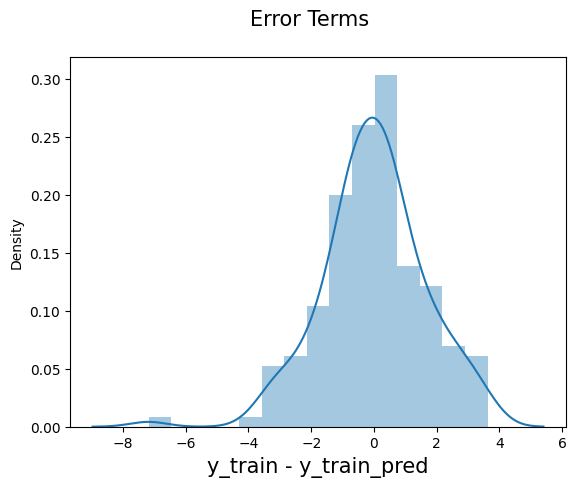

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()